In [8]:
import sys
sys.path.append("../")

import pandas as pd
import os
import statsmodels.formula.api as sm
import numpy as np


import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('seaborn-darkgrid')

from library import regulations
from library import analysis
from library import tables


In [9]:
data_path = '/Users/kylieleblancKylie/domino/dofis/data/'
table_path = '/Users/kylieleblancKylie/domino/dofis/results/descriptive/'
data = pd.read_csv(os.path.join(data_path, 'clean', 'master_data_district.csv'),
                  sep=",")
data = data[data.year == 2015]
data = data[data.doi == True]

/Users/kylieleblancKylie/anaconda/envs/spacy/lib/python3.7/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (6) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


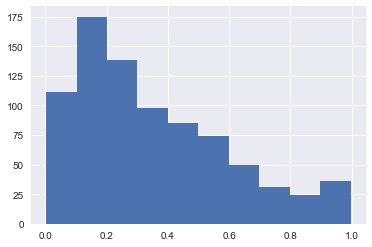

In [12]:
data.students_hisp.hist()

In [47]:
reg_stars = {}
for reg in regulations.mainless:
    reg_stars[reg] = reg
    
df = analysis.many_y_one_x(data, y_list = regulations.mainless, y_labels = reg_stars, x = 'students_hisp')
df['stars'] = np.where(df['P-value'] > .05, '', 
                  np.where((df['P-value'] <= .05) & (df['P-value'] > .01), '*', 
                      np.where((df['P-value'] <= .01) & (df['P-value'] > .001), '**', 
                          np.where((df['P-value'] <= .001), '***',''))))
for reg in df.Characteristic:
    reg_stars[reg] = df[df.Characteristic == reg]['stars'].values[0]
reg_stars

reg25_0811 ~ + 1 + students_hisp
                            OLS Regression Results                            
Dep. Variable:             reg25_0811   R-squared:                       0.009
Model:                            OLS   Adj. R-squared:                  0.008
Method:                 Least Squares   F-statistic:                     7.863
Date:                Tue, 15 Oct 2019   Prob (F-statistic):            0.00516
Time:                        09:05:34   Log-Likelihood:                 302.08
No. Observations:                 822   AIC:                            -600.2
Df Residuals:                     820   BIC:                            -590.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept    

                            OLS Regression Results                            
Dep. Variable:              reg21_352   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.001
Method:                 Least Squares   F-statistic:                    0.3357
Date:                Tue, 15 Oct 2019   Prob (F-statistic):              0.562
Time:                        09:05:34   Log-Likelihood:                -415.99
No. Observations:                 822   AIC:                             836.0
Df Residuals:                     820   BIC:                             845.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept         0.2136      0.025      8.713

{'reg25_0811': '**',
 'reg25_081': '',
 'reg25_0812': '',
 'reg25_082': '',
 'reg25_112': '',
 'reg25_111': '',
 'reg21_003': '',
 'reg21_102': '***',
 'reg21_401': '',
 'reg21_352': '',
 'reg21_354': '',
 'reg25_092': '***',
 'reg37_0012': '',
 'reg25_036': '**'}

In [35]:
bins = [0, .2, .4, .6, .8,1]
labels = [.2, .4, .6,.8,1]
data['bins_hispanic']  = pd.cut(data['students_hisp'], bins, labels = labels)
data[['students_hisp', 'bins_hispanic']].sample(20)

,students_hisp,bins_hispanic
4445,0.361611,0.4
4310,0.431012,0.6
3854,0.071856,0.2
4868,0.187227,0.2
3971,0.552768,0.6
4544,0.561538,0.6
4449,0.430746,0.6
4156,0.391128,0.4
4328,0.390946,0.4
4701,0.124138,0.2


In [36]:
data.bins_hispanic.values

[0.2, 0.2, 0.2, 0.2, 0.4, ..., 0.4, 0.2, 0.4, 1.0, 1.0]
Length: 822
Categories (5, float64): [0.2 < 0.4 < 0.6 < 0.8 < 1.0]

In [42]:
hisp_districts = data[(data.bins_hispanic == .8) | (data.bins_hispanic == 1)]
len(hisp_districts)

141

In [43]:
stubnames = sorted(
    set([match[0] for match in data.columns.str.findall(
    r'reg.*').values if match != [] ])
    )
proportion = []
number = []
for reg in stubnames:
    proportion.append(hisp_districts[reg].mean())
    number.append(hisp_districts[reg].sum())
regs = pd.DataFrame(
    {'law': stubnames,
     'proportion': proportion,
     'number': number
    }).sort_values(by = ['proportion'], ascending = False)
regs['label'] = regs['law'].map(regulations.labels)
regs.head(50)

,law,proportion,number,label
90,reg25_0811,0.943262,133.0,25.0811 - Minimum First Day of Instruction
19,reg21_003,0.808511,114.0,21.003 - Teacher Certification Required
89,reg25_081,0.404255,57.0,25.081 - Minimum Minutes of Operation
104,reg25_112,0.397163,56.0,25.112 - Class Size Maximum
43,reg21_102,0.390071,55.0,21.102 - Maximum Probationary Contract Length
60,reg21_401,0.312057,44.0,21.401 - Minimum Service Days Required for Tea...
105,reg25_113,0.297872,42.0,25.113 - Notice of Class Size
91,reg25_0812,0.297872,42.0,25.0812 - Minimum Last Day of Instruction
99,reg25_092,0.283688,40.0,25.092 - Minimum Attendance for Class Credit
35,reg21_053,0.276596,39.0,21.053 - Presentation of Teacher Certificates


In [44]:
cols = []
for reg in regulations.mainless:
    cols.append(reg)
cols.append('students_hisp')
p_exempt = data.groupby(['bins_hispanic'])[cols].mean().round(2)
p_exempt = p_exempt.reset_index()
#p_exempt = p_exempt.iloc[[0,4]]
p_exempt

,bins_hispanic,reg25_0811,reg25_081,reg25_0812,reg25_082,reg25_112,reg25_111,reg21_003,reg21_102,reg21_401,reg21_352,reg21_354,reg25_092,reg37_0012,reg25_036,students_hisp
0,0.2,0.98,0.38,0.27,0.24,0.47,0.14,0.86,0.58,0.38,0.21,0.04,0.15,0.16,0.25,0.12
1,0.4,0.99,0.47,0.27,0.28,0.42,0.16,0.89,0.52,0.35,0.22,0.07,0.33,0.25,0.23,0.29
2,0.6,0.96,0.49,0.31,0.26,0.46,0.19,0.91,0.48,0.36,0.16,0.04,0.32,0.25,0.19,0.49
3,0.8,0.98,0.47,0.30,0.29,0.42,0.19,0.87,0.45,0.36,0.22,0.10,0.25,0.28,0.16,0.69
4,1.0,0.90,0.31,0.29,0.10,0.36,0.07,0.72,0.31,0.24,0.22,0.05,0.33,0.17,0.14,0.91


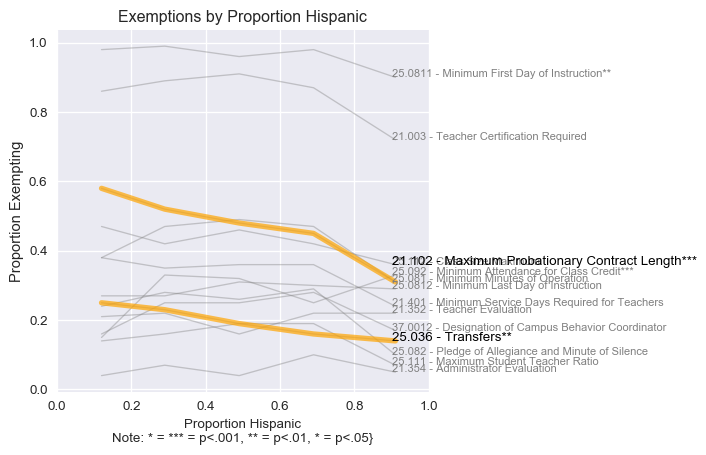

In [45]:
plt.style.use('seaborn')
my_dpi=96
plt.figure(figsize=(480/my_dpi, 480/my_dpi), dpi=my_dpi)


for column in p_exempt[regulations.mainless]:
   plt.plot(p_exempt['students_hisp'], p_exempt[column], marker='', color='grey', linewidth=1, alpha=0.4)

plt.xlim(0,1)

emphasize = ['reg21_102', 'reg25_036']

num=0
for i in range(len(regulations.mainless)):
   reg = regulations.mainless[num]
   if reg not in emphasize:
      plt.text(.9, p_exempt[reg][4] , regulations.labels[reg] + reg_stars[reg], horizontalalignment='left', size='small', color='grey')
   num+=1

for reg in emphasize:
    plt.plot(p_exempt['students_hisp'], p_exempt[reg], marker='', color='orange', linewidth=4, alpha=0.7, label = 'label')
    if reg == 'reg21_102':
        plt.text(.9, p_exempt[reg][4] + .05, regulations.labels[reg] + reg_stars[reg], horizontalalignment='left', size='medium', color='black')
    else:
        plt.text(.9, p_exempt[reg][4], regulations.labels[reg] + reg_stars[reg], horizontalalignment='left', size='medium', color='black')

plt.ylabel('Proportion Exempting')
plt.title('Exemptions by Proportion Hispanic')
plt.xlabel('Proportion Hispanic\nNote: * = *** = p<.001, ** = p<.01, * = p<.05}', size = 'medium')

plt.savefig(table_path + 'spaghetti_geography_hispanic.png', bbox_inches="tight")

plt.show()


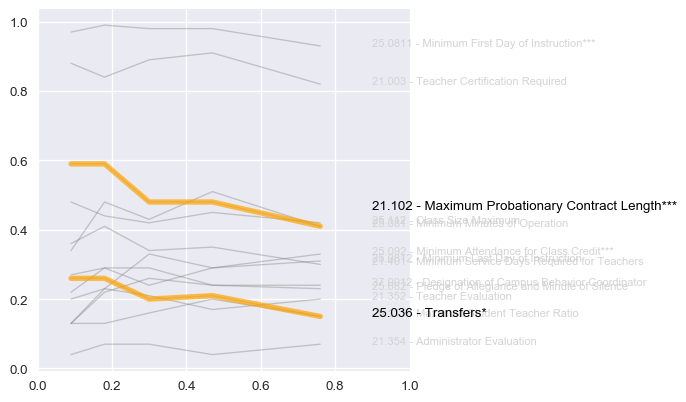

In [5]:
plt.style.use('seaborn')
my_dpi=96
plt.figure(figsize=(480/my_dpi, 480/my_dpi), dpi=my_dpi)


for column in p_exempt[regulations.mainless]:
   plt.plot(p_exempt['students_hisp'], p_exempt[column], marker='', color='grey', linewidth=1, alpha=0.4)

plt.xlim(0,1)

emphasize = ['reg21_102', 'reg25_036']

num=0
for i in range(len(regulations.mainless)):
   reg = regulations.mainless[num]
   if reg not in emphasize:
      plt.text(.9, p_exempt[reg][4] , regulations.labels[reg] + reg_stars[reg], horizontalalignment='left', size='small', color='lightgrey')
   num+=1

for reg in emphasize:
    plt.plot(p_exempt['students_hisp'], p_exempt[reg], marker='', color='orange', linewidth=4, alpha=0.7, label = 'label')
    if reg == 'reg21_102':
        plt.text(.9, p_exempt[reg][4] + .05, regulations.labels[reg] + reg_stars[reg], horizontalalignment='left', size='medium', color='black')
    else:
        plt.text(.9, p_exempt[reg][4], regulations.labels[reg] + reg_stars[reg], horizontalalignment='left', size='medium', color='black')


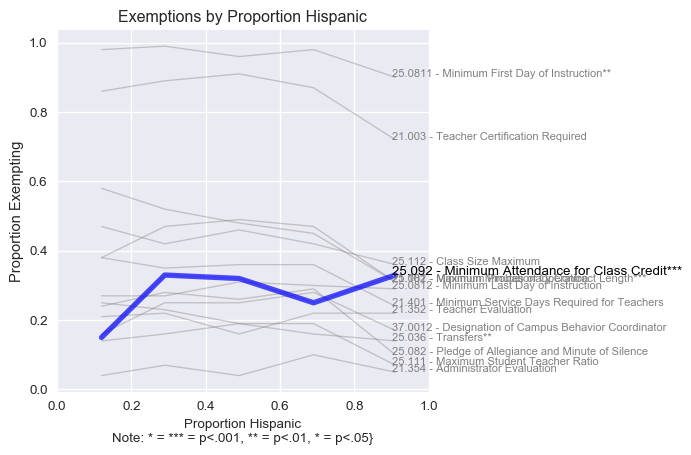

In [46]:
plt.style.use('seaborn')
my_dpi=96
plt.figure(figsize=(480/my_dpi, 480/my_dpi), dpi=my_dpi)


for column in p_exempt[regulations.mainless]:
   plt.plot(p_exempt['students_hisp'], p_exempt[column], marker='', color='grey', linewidth=1, alpha=0.4)

plt.xlim(0,1)

emphasize = ['reg25_092']

num=0
for i in range(len(regulations.mainless)):
   reg = regulations.mainless[num]
   if reg not in emphasize:
      plt.text(.9, p_exempt[reg][4] , regulations.labels[reg] + reg_stars[reg], horizontalalignment='left', size='small', color='grey')
   num+=1

for reg in emphasize:
    plt.plot(p_exempt['students_hisp'], p_exempt[reg], marker='', color='blue', linewidth=4, alpha=0.7, label = 'label')
    if reg == 'reg21_102':
        plt.text(.9, p_exempt[reg][4] + .05, regulations.labels[reg] + reg_stars[reg], horizontalalignment='left', size='medium', color='black')
    else:
        plt.text(.9, p_exempt[reg][4], regulations.labels[reg] + reg_stars[reg], horizontalalignment='left', size='medium', color='black')

plt.ylabel('Proportion Exempting')
plt.title('Exemptions by Proportion Hispanic')
plt.xlabel('Proportion Hispanic\nNote: * = *** = p<.001, ** = p<.01, * = p<.05}', size = 'medium')

plt.savefig(table_path + 'spaghetti_geography_hispanic.png', bbox_inches="tight")

plt.show()